Creating another variation on the initial data

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Train data needs params Data_Raw, train_data, X_train, y_train
# Test data needs params Data_Raw, test_data, X_test, y_test
def data_input(folder1, folder2, file_x, file_y):
    X = pd.read_csv(f"../Accident_Data_Preprocessing/{folder1}/{folder2}/{file_x}.csv")
    y = pd.read_csv(f"../Accident_Data_Preprocessing/{folder1}/{folder2}/{file_y}.csv")
    df = pd.concat([X, y], axis=1)
    return df
    

In [ ]:
# TEST SET INPUT
df = data_input("Data_Raw", "test_data", "X_test", "y_test")
df.head()

,ID,Source,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Severity
0,A-237917,Source2,2016-10-23 08:04:38,2016-10-23 09:04:14,39.011890,-76.904198,NaN,NaN,0.010,Accident on I-95 Capital Beltway Southbound at...,...,False,False,False,False,False,Day,Day,Day,Day,3
1,A-5361038,Source1,2022-03-10 17:06:30.000000000,2022-03-10 17:28:30.000000000,38.599807,-75.913079,38.606758,-75.902799,0.734,Stationary traffic on MD-392 from MD-14/E New ...,...,False,False,False,False,False,Day,Day,Day,Day,2
2,A-4110445,Source1,2022-09-19 04:45:21,2022-09-19 06:01:06,38.930465,-76.013555,38.931595,-76.019579,0.333,Incident on MD-404 WB near DULIN RD Drive with...,...,False,False,False,False,False,Night,Night,Night,Night,2
3,A-1228048,Source2,2020-12-15 08:03:36,2020-12-15 09:18:22,39.562180,-76.361221,NaN,NaN,0.000,Accident on Kahoe Rd at Bynum Ridge Rd.,...,False,False,False,False,False,Day,Day,Day,Day,2
4,A-1450465,Source2,2020-05-28 08:21:25,2020-05-28 09:05:57,39.277962,-77.323425,NaN,NaN,0.000,Accident on I-270 Northbound before Exit 22 MD...,...,False,False,False,False,False,Day,Day,Day,Day,2


In [ ]:
# TRAIN SET INPUT
#df = data_input("Data_Raw", "train_data", "X_train", "y_train")
#df.head()

## Drop columns unlikely to be useful

Too focused on timing or too fine grained or unique

In [5]:
df.columns

Index(['ID', 'Source', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Severity'],
      dtype='object')

In [6]:
df.drop(["ID","Source","Country"],axis=1,inplace=True) # drop clearly unneeded columns

In [7]:
df["Zipcode"] = df.Zipcode.apply(lambda x: str(x).split("-")[0]) # fix zipcodes so that they are all 5 digit

In [8]:
df.drop(["End_Time","End_Lat","End_Lng"],axis=1,inplace=True) #can't know these things before it happens

In [9]:
df.drop(["Start_Lat","Start_Lng","State","City"],axis=1,inplace=True)# so much of location data is redundant and correlated

In [10]:
df.drop(["Timezone","Weather_Timestamp","Airport_Code","Description"],axis=1,inplace=True)

In [11]:
df.drop(["Start_Time","Zipcode","County"],axis=1,inplace=True)

## Street Type

In [12]:
df = df[~df.Street.str.contains("Francis Scott Key Bridge",na=False)]

In [13]:
print(df.Street.value_counts().shape)
df.Street.value_counts()

(3479,)


Street
I-95 S                1171
I-95 N                1119
Capital Beltway S      814
Capital Beltway N      616
Capital Beltway E      554
                      ... 
Foxlake Dr               1
Walnut Ave               1
Devonshire Ln            1
Hudson Rd                1
Piney Orchard Pkwy       1
Name: count, Length: 3479, dtype: int64

In [14]:
def nsew(x,r):
    if x[-1] in ["N","S","E","W"]:
        r= r+x[-1]
    return r

In [15]:
def street_type(x):
    if "Tunl" in x or "Tunnel" in x:
        return "Tunnel"#nsew(x,"Tunnel")
    if "I-" in x:
        return "Interstate"
    if " Dr " in x or " Ave " in x or " Rd " in x or " Xing" in x or " Way " in x:
        return "local"
    if "Beltway" in x:
        return "Beltway"
    if "US-" in x[:4] or "MD-" in x[:4] or "Expy" in x:
        return "Highway"
    if "Hwy" in x or "Fwy" in x or "Highway" in x or "Route" in x or "Connector" in x or "Byp" in x or "Bypass" in x or "Gtwy" in x or "Brg" in x or "Trwy" in x:
        return "Highway"
    if x[-2:] in ["St","Pl","Dr","Sq"]:
        return "local"
    if "Ln" in x or "Rd" in x or "Ct" in x:
        return "local"
    if x[-3:] in ["Way","Cir","Ter","Trl","Plz","Aly","Grn","way","Ext"]:
        return "local"
    if "Ave" in x[-5:] or " Blvd" in x or " Pike" in x or "Pkwy" in x or "Crse" in x or "Alameda" in x:
        return "large_local"
    if "Garth" in x or "Spell" in x or "Psge" in x or "Chase" in x or "Cutoff" in x or "Spire" in x:
        return "local"
    if "Overlook" in x or "Battlefield" in x or "Cemetery" in x or "Park" in x or "Base" in x or "Concourse" in x or "Memorial" in x or "Booth's" in x:
        return "special"
    if "Loop" in x or "Greenway" in x or "West" in x or "ville" in x or "wood" in x:
        return "local"
    else:
        return "misc"
    
    return x

In [16]:
df["Street"] = df["Street"].astype(str)
df["Street"] = df.Street.apply(street_type)

In [ ]:
df=df.loc[~df.Street.str.contains("special") & ~df.Street.str.contains("misc")]


In [18]:
df.Street.value_counts()

Street
Interstate     7808
local          6812
large_local    4987
Highway        4952
Beltway        2832
Tunnel          410
Name: count, dtype: int64

## Weather Condition

In [19]:
df["Weather_Condition"].value_counts()

Weather_Condition
Fair                    7689
Cloudy                  3560
Mostly Cloudy           2851
Partly Cloudy           1913
Clear                   1898
                        ... 
Light Freezing Fog         2
Sand                       1
Light Sleet / Windy        1
Light Snow and Sleet       1
Wintry Mix / Windy         1
Name: count, Length: 61, dtype: int64

In [20]:
df = df.loc[(df.Weather_Condition != "Sand")] # too few values

In [21]:
# missing values count as a float
# change to "unknown" instead. Later we can decide if we want to keep
df["Weather_Condition"] = df["Weather_Condition"].fillna("unknown")

In [22]:
df["Weather_Condition"] = df["Weather_Condition"].apply(lambda x: "None" if "N/A" in x else x)

In [23]:
df["Weather_Condition"]=df["Weather_Condition"].apply(lambda x: "Windy" if "Windy" in x else x)

In [24]:
def mapping_1(x):
    tomap = {"Light Drizzle":"Drizzle",
            "Light Rain with Thunder":"Light Thunderstorms and Rain",
            "Thunder in the Vicinity":"Thunder",
            "Heavy Drizzle":"Rain",
            "Mist":"Fog",
            "Light Freezing Drizzle":"Light Freezing Rain"}
    if x in tomap:
        return tomap[x]
    return x

In [25]:
def mapping_2(x):
    tomap = {"Light Rain Shower":"Drizzle",
             "Light Rain":"Drizzle",
            "Light Ice Pellets":"Ice Pellets",
            "Shallow Fog":"Fog"}
    if x in tomap:
        return tomap[x]
    return x

In [26]:
def mapping_3(x):
    tomap = {"Heavy Ice Pellets":"Ice Pellets",
            "Drizzle and Fog":"Fog",
            "Patches of Fog":"Fog",
            "Heavy Snow":"Snow",
            "Heavy Thunderstorms and Rain":"Thunderstorms",
            "T-Storm":"Thunderstorms",
            "Heavy T-Storm":"Thunderstorms",
            "Thunderstorms and Rain":"Thunderstorms"}
    if x in tomap:
        return tomap[x]
    return x

In [27]:
def mapping_4(x):
    tomap = {"Light Snow Shower":"Snow",
            "Light Snow":"Snow",
            "Light Rain Showers":"Drizzle",
            "Light Thunderstorms and Rain":"Thunderstorms"}
    if x in tomap:
        return tomap[x]
    return x

In [28]:
df["Weather_Condition"]=df["Weather_Condition"].apply(mapping_1)                        

In [29]:
df["Weather_Condition"]=df["Weather_Condition"].apply(mapping_2)

In [30]:
df["Weather_Condition"]=df["Weather_Condition"].apply(mapping_3)

In [31]:
df["Weather_Condition"]=df["Weather_Condition"].apply(mapping_4)

In [32]:
df.Weather_Condition.value_counts()

Weather_Condition
Fair                    7689
unknown                 5370
Cloudy                  3560
Mostly Cloudy           2851
Partly Cloudy           1913
Clear                   1898
Overcast                1190
Drizzle                 1138
Scattered Clouds         616
Snow                     335
Fog                      319
Rain                     263
Windy                    211
Heavy Rain                86
Wintry Mix                83
Haze                      77
Thunderstorms             68
Thunder                   41
Light Freezing Rain       29
Snow and Sleet            13
None                       9
Light Sleet                8
Thunderstorm               8
Small Hail                 6
Hail                       5
Sleet                      5
Ice Pellets                4
Heavy Sleet                2
Light Freezing Fog         2
Light Snow and Sleet       1
Name: count, dtype: int64

None and Light Sleet have almost no rows will values, drop them.
Light Freezing Fog has 10 rows. Change to Fog.
Leave others for now. Will need to decide if further combinations are necessary.

In [33]:
df = df.loc[(df.Weather_Condition != "None") & (df.Weather_Condition != "Light Sleet")]

In [34]:
df=df.reset_index(drop=True)

In [35]:
df.shape

(27783, 29)

## Wind Direction

In [36]:
# Can decide later whether to keep or remove rows with unknown values
df["Wind_Direction"] = df.Wind_Direction.fillna("unknown")

In [37]:
df.Wind_Direction.value_counts()

Wind_Direction
CALM        4451
unknown     4015
WNW         1624
North       1571
NW          1562
Calm        1494
W           1273
S           1223
NNW         1107
SSW         1064
N            901
SW           862
SSE          757
SE           741
NNE          726
WSW          717
NE           638
ENE          568
E            554
ESE          474
West         402
VAR          390
South        291
East         223
Variable     155
Name: count, dtype: int64

In [38]:
# Basic cleanup of alternative spellings
def wind_map(x):
    tomap = {"CALM":"Calm","South":"S","West":"W","North":"N","East":"E","VAR":"Variable"}
    if x in tomap:
        return tomap[x]
    return x

In [39]:
# Less fine grained values
def wind_2(x):
    tomap = {"WNW":"NW","NNW":"NW","SSW":"SW","SSE":"SE","WSW":"SW","NNE":"NE","ENE":"NE","ESE":"SE"}
    if x in tomap:
        return tomap[x]
    return x

In [40]:
df["Wind_Direction"] = df.Wind_Direction.apply(wind_map)

In [41]:
df["Wind_Direction"] = df.Wind_Direction.apply(wind_2)

In [42]:
df.Wind_Direction.value_counts()

Wind_Direction
Calm        5945
NW          4293
unknown     4015
SW          2643
N           2472
SE          1972
NE          1932
W           1675
S           1514
E            777
Variable     545
Name: count, dtype: int64

## Missing Values: drop columns

In [43]:
df.columns

Index(['Distance(mi)', 'Street', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Severity'],
      dtype='object')

In [44]:
df.shape

(27783, 29)

In [45]:
df.isna().sum()

Distance(mi)                0
Street                      0
Temperature(F)           3121
Wind_Chill(F)            9516
Humidity(%)              3147
Pressure(in)             2900
Visibility(mi)           5482
Wind_Direction              0
Wind_Speed(mph)          6858
Precipitation(in)        9835
Weather_Condition           0
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction                    0
No_Exit                     0
Railway                     0
Roundabout                  0
Station                     0
Stop                        0
Traffic_Calming             0
Traffic_Signal              0
Turning_Loop                0
Sunrise_Sunset             54
Civil_Twilight             54
Nautical_Twilight          54
Astronomical_Twilight      54
Severity                    0
dtype: int64

In [46]:
# half of the rows are missing wind chill. Better to just drop the column
df.drop(["Wind_Chill(F)"],axis=1,inplace=True)

In [47]:
# half of the rows are missing precipitation, and weather condition already
# covers that situation more or less. So drop
df.drop(["Precipitation(in)"],axis=1,inplace=True)

<Axes: >

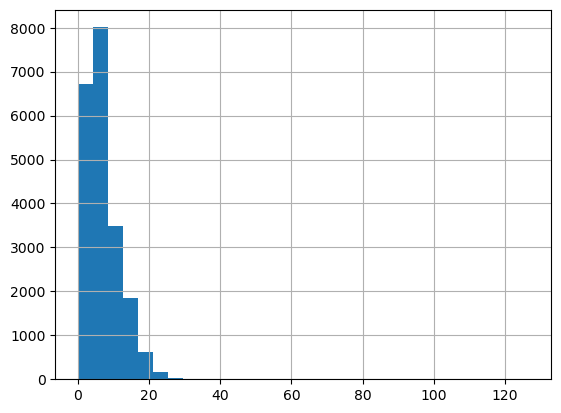

In [48]:
df["Wind_Speed(mph)"].hist(bins=30)

In [49]:
df[df["Wind_Speed(mph)"] > 40].shape[0]

1

Wind speed has a significant number of missing values. It is also a fairly tight distribution other than 11 values that are larger. Although wind speed could be useful in predicting severity, it may not be worth keeping in this situation. I think we try without it first.

In [50]:
df.drop(["Wind_Speed(mph)"],inplace=True,axis=1)

In [51]:
df.isna().sum()

Distance(mi)                0
Street                      0
Temperature(F)           3121
Humidity(%)              3147
Pressure(in)             2900
Visibility(mi)           5482
Wind_Direction              0
Weather_Condition           0
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction                    0
No_Exit                     0
Railway                     0
Roundabout                  0
Station                     0
Stop                        0
Traffic_Calming             0
Traffic_Signal              0
Turning_Loop                0
Sunrise_Sunset             54
Civil_Twilight             54
Nautical_Twilight          54
Astronomical_Twilight      54
Severity                    0
dtype: int64

In [52]:
df.dropna().shape

(22004, 26)

It looks like dropping NA values doesn't remove too many rows, there must be rows with multiple NA values. So let's drop NA rows.

In [53]:
df.dropna(inplace=True)

## Twilights

We don't need four different twilights.

In [54]:
df.columns

Index(['Distance(mi)', 'Street', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Weather_Condition',
       'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'Severity'],
      dtype='object')

In [55]:
df.drop(['Civil_Twilight','Nautical_Twilight', 'Astronomical_Twilight'],inplace=True,axis=1)

## Any columns have too little info?

In [56]:
for col in ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop']:
    print(df[col].value_counts())

Amenity
False    21879
True       125
Name: count, dtype: int64
Bump
False    22002
True         2
Name: count, dtype: int64
Crossing
False    20683
True      1321
Name: count, dtype: int64
Give_Way
False    21941
True        63
Name: count, dtype: int64
Junction
False    19320
True      2684
Name: count, dtype: int64
No_Exit
False    21972
True        32
Name: count, dtype: int64
Railway
False    21955
True        49
Name: count, dtype: int64
Roundabout
False    22003
True         1
Name: count, dtype: int64
Station
False    21758
True       246
Name: count, dtype: int64
Stop
False    21756
True       248
Name: count, dtype: int64
Traffic_Calming
False    21917
True        87
Name: count, dtype: int64
Traffic_Signal
False    19488
True      2516
Name: count, dtype: int64
Turning_Loop
False    22004
Name: count, dtype: int64


Bump, Give_Way, No_Exit, Roundabout, have almost no True values, so drop.
All values in Turning_Loop are identical, so drop.

In [57]:
df.drop(['Bump', 'Give_Way', 'No_Exit', 'Roundabout','Turning_Loop'],inplace=True,axis=1)

Will need to consider if it is worth keeping all of these or combining in some way.

In [58]:
df.columns

Index(['Distance(mi)', 'Street', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Weather_Condition',
       'Amenity', 'Crossing', 'Junction', 'Railway', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Severity'],
      dtype='object')

In [59]:
df.shape

(22004, 18)

In [60]:
df.head(50)

,Distance(mi),Street,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Weather_Condition,Amenity,Crossing,Junction,Railway,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Severity
0,0.010,Beltway,46.4,62.0,30.01,10.00,SW,Scattered Clouds,False,False,False,False,False,False,False,False,Day,3
1,0.734,local,50.0,47.0,30.08,10.00,NE,Fair,False,True,False,True,False,False,False,False,Day,2
2,0.333,Highway,35.0,64.0,29.96,10.00,Calm,Partly Cloudy,False,False,False,False,False,False,False,False,Night,2
3,0.000,local,28.0,80.0,30.26,7.00,Calm,Partly Cloudy,False,False,False,False,False,False,False,False,Day,2
4,0.000,Highway,72.0,91.0,29.71,3.00,SE,Drizzle,False,False,True,False,False,False,False,False,Day,2
5,0.418,Highway,43.0,76.0,29.73,10.00,Calm,Fair,False,False,True,False,False,False,False,False,Night,2
6,0.289,Highway,77.0,83.0,29.65,10.00,SE,Partly Cloudy,False,False,False,False,False,False,False,False,Day,2
7,1.004,Highway,70.0,94.0,29.44,10.00,Variable,Thunderstorms,False,False,False,False,False,False,False,False,Day,2
9,0.489,Highway,58.0,94.0,29.34,2.00,N,Cloudy,False,False,True,False,False,False,False,False,Day,2
10,0.280,Highway,65.0,50.0,30.17,10.00,NW,Cloudy,False,False,False,False,False,False,False,False,Day,2


In [61]:
df.columns

Index(['Distance(mi)', 'Street', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Weather_Condition',
       'Amenity', 'Crossing', 'Junction', 'Railway', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Severity'],
      dtype='object')

In [62]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(22004, 18)
(21416, 18)


In [63]:
df.head()

,Distance(mi),Street,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Weather_Condition,Amenity,Crossing,Junction,Railway,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Severity
0,0.010,Beltway,46.4,62.0,30.01,10.0,SW,Scattered Clouds,False,False,False,False,False,False,False,False,Day,3
1,0.734,local,50.0,47.0,30.08,10.0,NE,Fair,False,True,False,True,False,False,False,False,Day,2
2,0.333,Highway,35.0,64.0,29.96,10.0,Calm,Partly Cloudy,False,False,False,False,False,False,False,False,Night,2
3,0.000,local,28.0,80.0,30.26,7.0,Calm,Partly Cloudy,False,False,False,False,False,False,False,False,Day,2
4,0.000,Highway,72.0,91.0,29.71,3.0,SE,Drizzle,False,False,True,False,False,False,False,False,Day,2


In [66]:
df.columns

Index(['Distance(mi)', 'Street', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Weather_Condition',
       'Amenity', 'Crossing', 'Junction', 'Railway', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Severity'],
      dtype='object')

In [67]:
# Train data needs Data_Cleaned, train_data, X_train_control, y_train_control
# Test data needs Data_Cleaned, test_data, X_test_control, y_test_control
def data_output(df, folder1, folder2, file_x, file_y):
    col_class = ['Class']
    col_data = ['Distance(mi)', 'Street', 'Temperature(F)', 'Humidity(%)',
                'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Weather_Condition',
                'Amenity', 'Crossing', 'Junction', 'Railway', 'Station', 'Stop',
                'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset']

    df = df.rename(columns={'Severity' : 'Class'})
    df = df.drop_duplicates()

    X = df.iloc[:,:-1]
    y = df.Class

    X.to_csv(f'../Accident_Data_Preprocessing/{folder1}/{folder2}/{file_x}.csv', columns = col_data, index = False)
    y.to_csv(f'../Accident_Data_Preprocessing/{folder1}/{folder2}/{file_y}.csv', columns = col_class, index = False)

In [68]:
# TRAIN OUTPUT
#data_output(df, "Data_Cleaned", "train_data", "X_train_control", "y_train_control")

In [69]:
# TEST OUTPUT
data_output(df, "Data_Cleaned", "test_data", "X_test_control", "y_test_control")